# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-11556.0,-4917.0,-5891.0,-2808.0,-2591.0,-1266.0
1,-6736.0,-2113.0,-2946.0,-2015.0,-857.0,-395.0
2,3615.0,6857.0,11907.0,1353.0,4227.0,854.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-8060.0,-2748.0,-2696.0,-1262.0,-526.0,-707.0
1,-3240.0,56.0,249.0,-469.0,1208.0,164.0
2,7111.0,9026.0,15102.0,2899.0,6292.0,1413.0


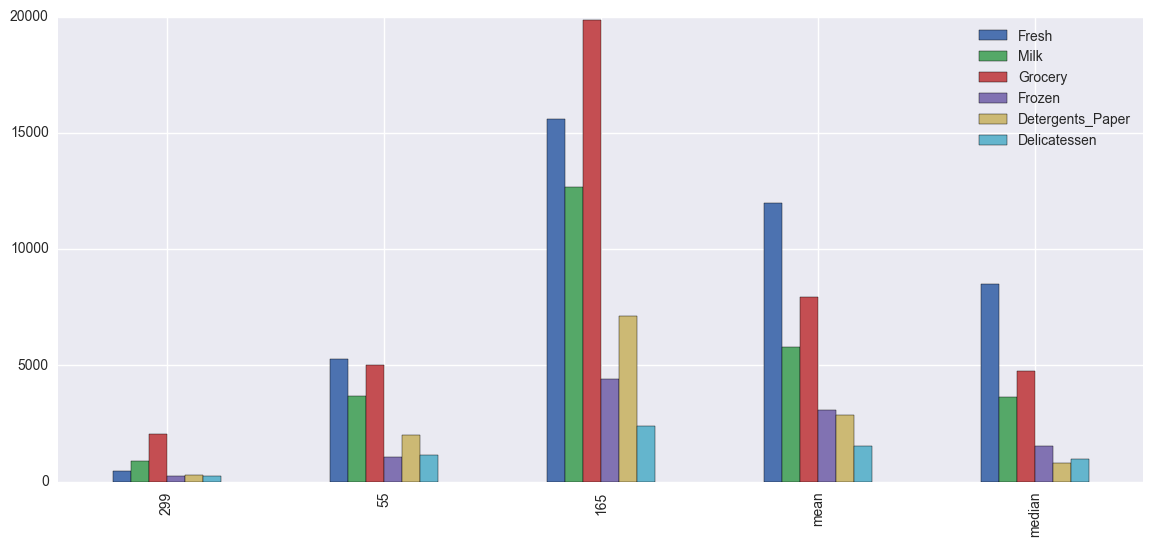

In [46]:
# TODO: Select three indices of your choice you wish to sample from the dataset
condition=0
#get 3 samples 
# 1. lower 25% for all categories
# 2. near mean
# 3. and above 75%
i=0

#getting a sample that represents the type of data point that represents a low point in the distribution but not
#an outlier
indices=[]
for p1,p2 in[[5,30],[35,65],[70,95]]:
    i=0
    found=0
    while found == 0:
        if np.percentile(data['Fresh'],p1)<data.loc[i]['Fresh']<np.percentile(data['Fresh'],p2):
            if np.percentile(data['Milk'],p1)<data.loc[i]['Milk']<np.percentile(data['Milk'],p2):
                if np.percentile(data['Grocery'],p1)<data.loc[i]['Grocery']<np.percentile(data['Grocery'],p2):
                    if np.percentile(data['Frozen'],p1)<data.loc[i]['Frozen']<np.percentile(data['Frozen'],p2):
                        if np.percentile(data['Detergents_Paper'],p1)<data.loc[i]['Detergents_Paper']<np.percentile(data['Detergents_Paper'],p2):
                            if np.percentile(data['Delicatessen'],p1)<data.loc[i]['Delicatessen']<np.percentile(data['Delicatessen'],p2):
                                found=1
                                indices.append(i)
                                


        i=i+1        
    
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
#print "Chosen samples of wholesale customers dataset:"
#display(samples)

##HELP CODE USING SEABORN
# Import Seaborn, a very powerful library for Data Visualisation
import seaborn as sns
display(samples-np.round(data.mean()))
display(samples-np.round(data.median()))
samples_bar = samples.append([data.describe().loc['mean'],data.describe().loc['50%']])
samples_bar.index = indices + ['mean']+['median']
_ = samples_bar.plot(kind='bar', figsize=(14,6))


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** 
These three samples represent three points that have some statistical revelation to the data. First sample (299) is located below the mean and median for each category, thus the sample should represent a small businesses (ie: cafes or small retailers). The second sample(55) is closest to the mean (closest to median out of the 3 selected samples), thus it is the closest out of these 3 samples to representing the mean of the population. Third sample(165) is above the mean and median for each category, and thus represents high spending customers such as massive retailers.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
print data.columns
for col in data.columns:

    feature_to_target=col
    new_data = data.drop(feature_to_target,axis = 1, inplace = False)

    target= data[feature_to_target]
    # TODO: Split the data into training and testing sets using the given feature as the target
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=1)

    # TODO: Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state=1)
    regressor.fit(X_train,y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test,y_test)
    print "R^2 score for removing: {} is equal to:  {}".format(feature_to_target,score)

Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicatessen'],
      dtype='object')
R^2 score for removing: Fresh is equal to:  -0.923373659298
R^2 score for removing: Milk is equal to:  0.515849943807
R^2 score for removing: Grocery is equal to:  0.795768311576
R^2 score for removing: Frozen is equal to:  -0.649574327334
R^2 score for removing: Detergents_Paper is equal to:  0.815241279195
R^2 score for removing: Delicatessen is equal to:  -0.429125195659


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I initially tried to remove Milk and the prediction score is 0.516 thus Milk is not an essential feature when the data without milk the model can predict up to 51.6% of the variance of Milk data. However, without Fresh the model performs the worst. As Fresh is the most difficult feature to predict, it has to be relevant to customer spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

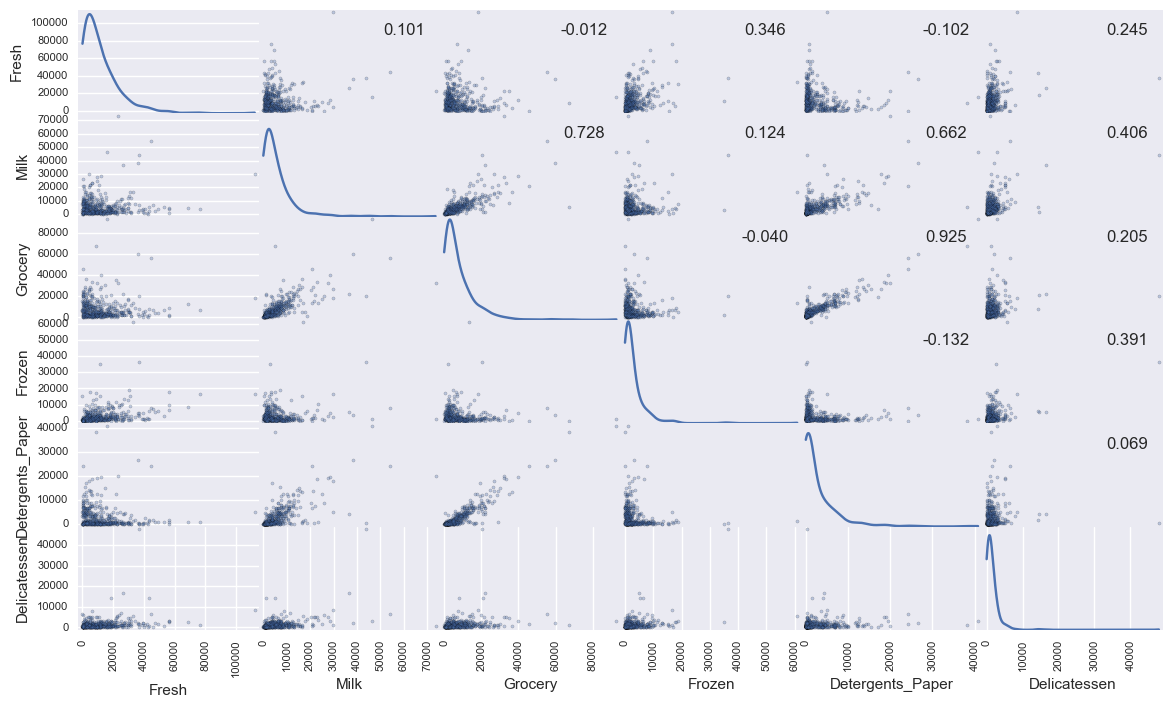

In [48]:
# Produce a scatter matrix for each pair of features in the data
axes=pd.scatter_matrix(data,alpha=0.3, figsize=(14,8), diagonal='kde')
corr=data.corr().as_matrix()
for i,j in zip(*np.triu_indices_from(axes,k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**    
**Delicatessen** does not show correlation with any of the other features; in terms of linear regression, the slope appears to be horizontal, thus no matter how many other products are sold, the number of delicatessen sold is not affected. The distribution of data is right skewed (mean>median), thus majority of clients have generally sold little amounts of delicatessen.   

**Detergents paper** has a positive correlation with Milk and a very strong correlation with Groceries. No clear correlation is observed with other features.  

**Frozen** products do not have correlation with other products; no clear trend in the data is visible.   

**Grocery** product sales show a correlation with Milk and Detergent paper.   

**Milk** sales are correlated with Grocery and Detergent paper sales.   

**Fresh** sales do not have a clear correlation with any other feature; no clear trend is visible.   

All the feature data is right skewed; with most data points located on the left end. As expected from the R2 scores; Fresh has no clear correlation with any feature, thus removing it from the data makes it impossible to predict using the data contained in the other features.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

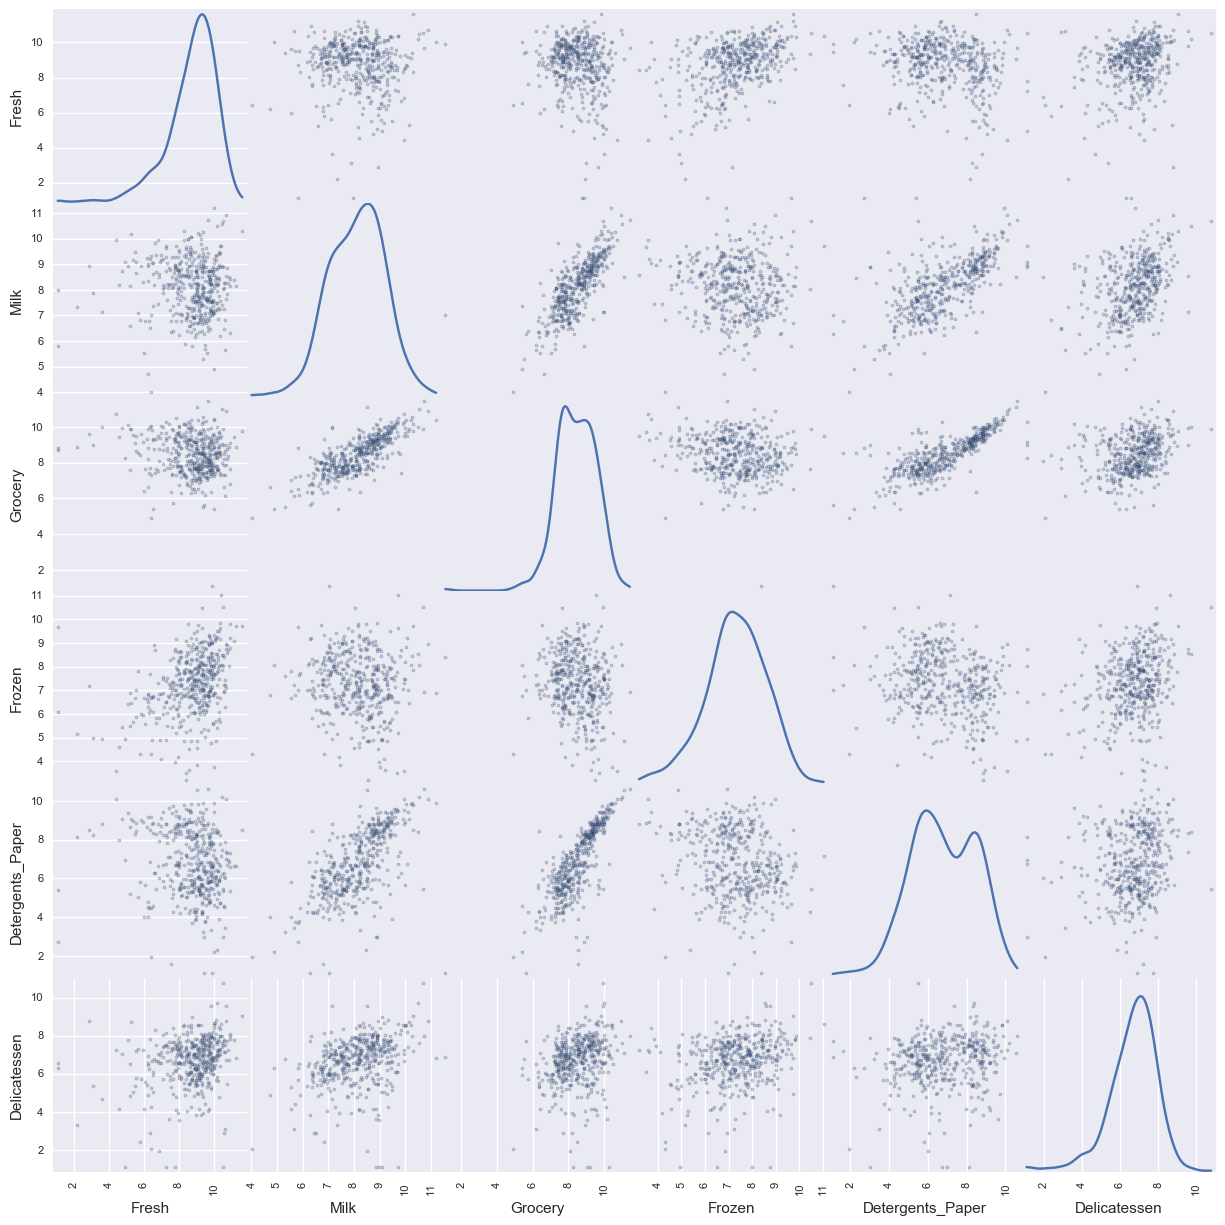

In [49]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (15,15), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [51]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6.095825,6.778785,7.630461,5.575949,5.669881,5.556828
1,8.568646,8.211483,8.518193,6.963190,7.612831,7.029973
2,9.655987,9.445650,9.896362,8.395026,8.868976,7.774436


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [52]:
# For each feature find the data points with extreme high or low values
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "For feature {}, Q1= {}, Q3={}".format(feature,Q1,Q3)
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    outliers=outliers+(list(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index))
outlier_dict={}
for n_sample in outliers:
    if n_sample in outlier_dict.viewkeys():
        outlier_dict[n_sample]=outlier_dict[n_sample]+1
    else:
        outlier_dict[n_sample]=1
        
print outlier_dict
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print "Shape of old data matrix: {}".format(log_data.shape)
print "Shape of new data matrix after removing outliers: {}".format(good_data.shape)

For feature Fresh, Q1= 8.04805870221, Q3=9.73706394795
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


For feature Milk, Q1= 7.33498124004, Q3=8.88048008859
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


For feature Grocery, Q1= 7.67461620137, Q3=9.27385367724
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


For feature Frozen, Q1= 6.60967774917, Q3=8.17589608318
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


For feature Detergents_Paper, Q1= 5.54810142479, Q3=8.27434059875
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


For feature Delicatessen, Q1= 6.01187465693, Q3=7.50672842655
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


{128: 2, 193: 1, 264: 1, 137: 1, 142: 1, 145: 1, 154: 3, 412: 1, 285: 1, 161: 1, 420: 1, 38: 1, 171: 1, 429: 1, 175: 1, 304: 1, 305: 1, 439: 1, 184: 1, 57: 1, 187: 1, 65: 2, 66: 2, 203: 1, 325: 1, 289: 1, 75: 2, 81: 1, 338: 1, 86: 1, 343: 1, 218: 1, 95: 1, 96: 1, 353: 1, 98: 1, 355: 1, 356: 1, 357: 1, 233: 1, 109: 1, 183: 1}
Shape of old data matrix: (440, 6)
Shape of new data matrix after removing outliers: (398, 6)


In [53]:
data.ix[outliers]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,85,20959,45828,36,24231,1423
66,9,1534,7417,175,3468,27
81,219,9540,14403,283,7818,156
95,3,2920,6252,440,223,709
96,23,2616,8118,145,3874,217
128,140,8847,3823,142,1062,3
171,200,25862,19816,651,8773,6250
193,180,3485,20292,959,5618,666
218,18,7504,15205,1285,4797,6372
304,161,7460,24773,617,11783,2410


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Yes, some of the samples are considered outliers for more than one dataset(outlier_dict shows that). Datapoints should be removed if we consider to implement ICA/PCA as we are aiming to get the general variance of the data, outliers may represent difficult situations for PCA to capture the main variance on an axis (they can be considered as 'noise' to PCA). Thus, I removed the samples that were considered as noise to any feature.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

             Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4993 -0.0976  0.4109   0.4511 -0.1280   
Dimension 2              0.7252  0.5032  0.5479   0.5363  0.5020   
Dimension 3              0.8301  1.2484  0.3935   0.5567  0.2350   
Dimension 4              0.9279  0.9817  0.2560   0.4857  0.9483   
Dimension 5              0.9767  0.9931  0.9643   0.8025  1.0154   
Dimension 6              1.0000  1.0474  1.4820  -0.0242  0.9683   

             Detergents_Paper  Delicatessen  
Dimension 1            0.7595        0.1579  
Dimension 2            0.7219        0.6213  
Dimension 3            0.9568        0.0791  
Dimension 4            1.2725       -0.4654  
Dimension 5            0.7996       -0.8774  
Dimension 6            1.0076       -0.8680  


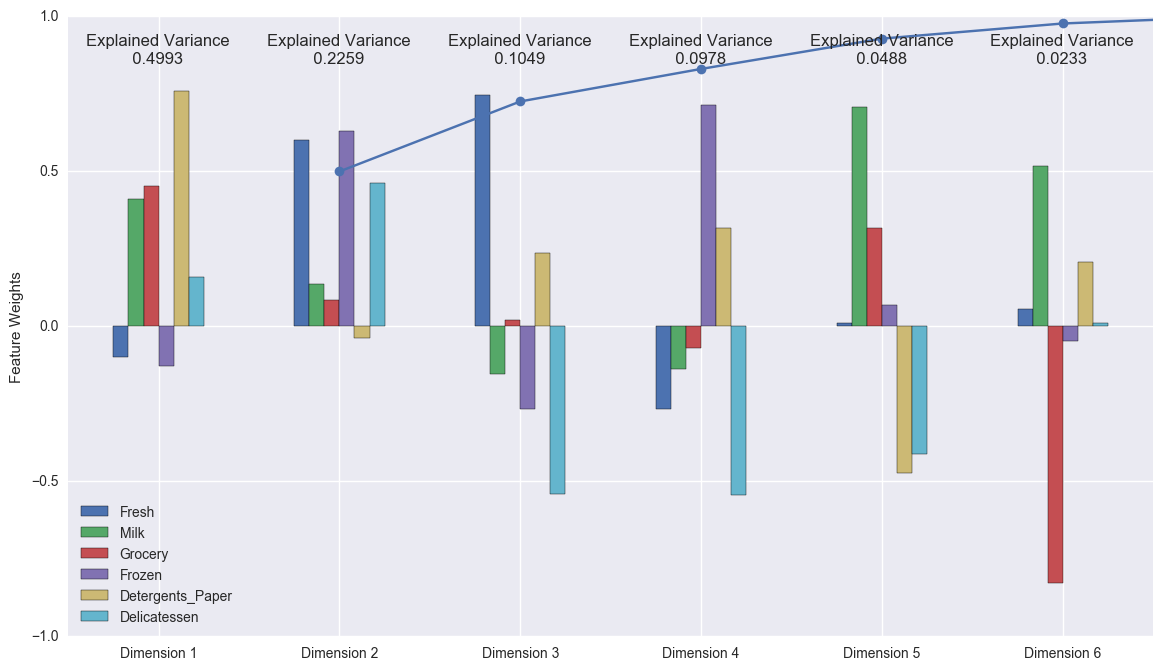

In [54]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=len(log_data.keys()))
pca.fit(good_data)
# TODO: Transform the sample log-data using the PCA fit above

pca_samples =pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

print pca_results.cumsum()

import matplotlib.pyplot as plt
x = np.arange(1, 7)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o')

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** I am looking for 6 PCA components, as that is the highest possible number of components attainable without the risk of overfitting data. The first component explains about 50% of the variance in data, first two 73% and first four 93%. First component has heavy positive weights on Milk Grocery and Detergents Paper, this is categorized by costumers spending on retail goods. Component two has positive weights for Fresh, Frozen, and Delicatessen which represents customer spending on restaurants. Components 3 and 4 represent a small variance in the data and have negative weights for some feature; component 3 shows that if a customer spends on Fresh he is likely to NOT spend on delicatessen or Frozen. Component 4 explains roughly 9% of the variance, that is there are customers who are not willing to spend on Frozen and Delicatessen, contrary to what Component 2 says, thus these two components represent different type of customers.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [56]:
# Display sample log-data after having a PCA transformation applied
pca_samples=pca.transform(log_samples)
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.4382,-3.6579,-1.0164,0.0002,-0.3161,-0.3545
1,0.8402,-0.4169,-0.0896,-0.1186,-0.4245,0.1404
2,2.7511,1.7225,0.0674,0.3363,0.0940,-0.1000


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [64]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [65]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))


,Dimension 1,Dimension 2
0,-1.4382,-3.6579
1,0.8402,-0.4169
2,2.7511,1.7225


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**  
**K-Means** starts its original estimation of means at a random point thus for different iterations we will not get the same result, however it is a very fast algorithm and after a few iterations it will converge to an optimal solution.    
** Gaussian Mixture Model ** Gaussian mixture model has the advantage of providing a probability as its classification (soft clustering); considering that after the log transformation of the data, their KDE is similar to a gaussian distribution, GMM should outperform K-Means, as the data does not appear to have clear grouping features in its distribution.   
Thus in this dataset Gaussian Mixture Modelling should be applied.  

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [66]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
print "K-Means Scores"
for n in range(2,20):
    clusterer = KMeans(n_clusters=n)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)


    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    from sklearn.metrics import silhouette_score
    score = silhouette_score(reduced_data,preds,random_state=1)
    
    print "n_clusters= {} Score : {}".format(n,round(score,3))
    
print "\n \n Gaussian Mixture Model Results"
from sklearn import mixture
for n in range(2,20):
    clusterer=mixture.GMM(n_components=n)
    clusterer.fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    sample_preds = clusterer.predict(pca_samples)
    score = silhouette_score(reduced_data,preds,random_state=1)
    
    print "n_clusters= {} Score : {}".format(n,round(score,3))

K-Means Scores
n_clusters= 2 Score : 0.447
n_clusters= 3 Score : 0.364
n_clusters= 4 Score : 0.331
n_clusters= 5 Score : 0.35
n_clusters= 6 Score : 0.363
n_clusters= 7 Score : 0.356
n_clusters= 8 Score : 0.36
n_clusters= 9 Score : 0.367
n_clusters= 10 Score : 0.352
n_clusters= 11 Score : 0.353
n_clusters= 12 Score : 0.364
n_clusters= 13 Score : 0.355
n_clusters= 14 Score : 0.356
n_clusters= 15 Score : 0.344
n_clusters= 16 Score : 0.355
n_clusters= 17 Score : 0.355
n_clusters= 18 Score : 0.355
n_clusters= 19 Score : 0.342

 
 Gaussian Mixture Model Results
n_clusters= 2 Score : 0.444
n_clusters= 3 Score : 0.357
n_clusters= 4 Score : 0.292
n_clusters= 5 Score : 0.268
n_clusters= 6 Score : 0.307
n_clusters= 7 Score : 0.274
n_clusters= 8 Score : 0.316
n_clusters= 9 Score : 0.322
n_clusters= 10 Score : 0.308
n_clusters= 11 Score : 0.196
n_clusters= 12 Score : 0.21
n_clusters= 13 Score : 0.218
n_clusters= 14 Score : 0.086
n_clusters= 15 Score : 0.136
n_clusters= 16 Score : 0.158
n_clusters= 

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**  For GMM the highest score is with n_clusters=2. This could be explained due to the fact that we fed the algorithm 2 pca components.


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

[[-1.38467291  0.05449647]
 [ 1.8212074  -0.07167713]]


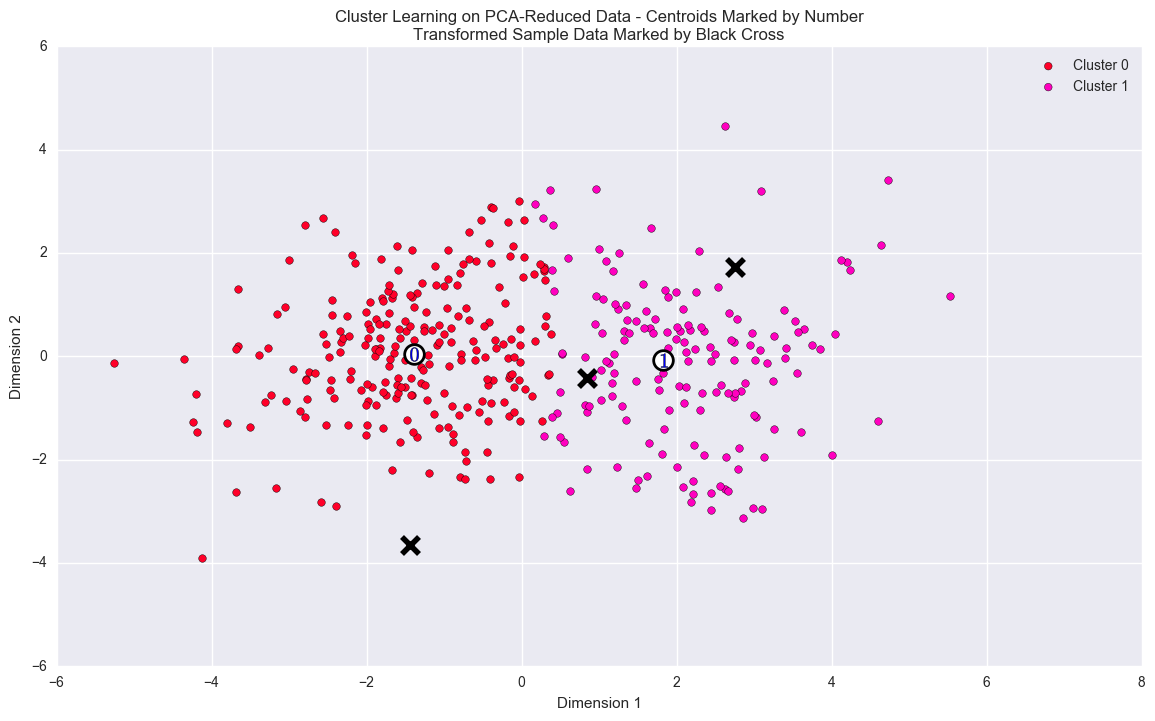

In [67]:
# Display the results of the clustering from implementation
clusterer=mixture.GMM(n_components=2)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data,preds,random_state=1)
centers = clusterer.means_
print centers

rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8967.0,1920.0,2437.0,2081.0,309.0,741.0
Segment 1,6079.0,7042.0,10241.0,1275.0,3546.0,1159.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,444,879,2060,264,290,259
1,5264,3683,5005,1057,2024,1130
2,15615,12653,19858,4425,7108,2379


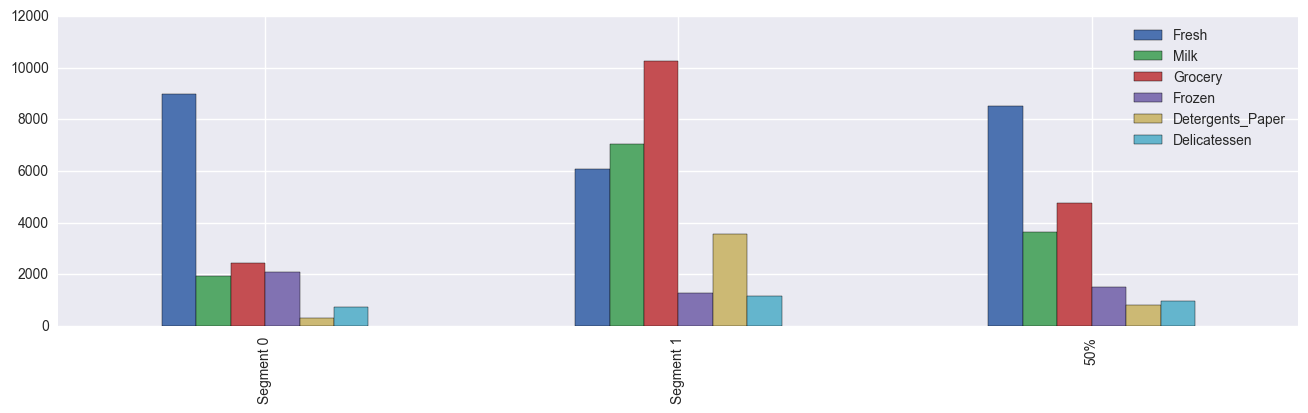

In [72]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
display(data.describe())
display(samples)
true_centers = true_centers.append(data.describe().ix['50%'])
true_centers.plot(kind = 'bar', figsize = (16, 4))

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**  This sepperation into two segments, is between customers who spend more on Fresh and Frozen(such as restaurants) compared to customers who spend more on Milk Grocery and Detergents Paper (retail stores). Generally, the mean and 50% for each category are between the centroids of the two segments, except for Frozen, thus quite a few of the samples are very skewed for frozen. Interestingly Segment 1 has similar values of Milk, Grocery and Detergents paper to the 75% percentile of the data, thus it is a very strong representation to these specific types of customers.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [75]:
# Display the predictions
print indices
display(samples)
display(true_centers)

for i,j in enumerate(pca_samples):# i see, so this will give me Prob that sample 0 belongs to segment0 or segment 1 and so on
    print "Probability of Sample {}: {}".format(i,clusterer.predict_proba([j])[0])

[299, 55, 165]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,444,879,2060,264,290,259
1,5264,3683,5005,1057,2024,1130
2,15615,12653,19858,4425,7108,2379


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8967.0,1920.0,2437.0,2081.0,309.0,741.0
Segment 1,6079.0,7042.0,10241.0,1275.0,3546.0,1159.0
50%,8504.0,3627.0,4755.5,1526.0,816.5,965.5


Probability of Sample 0: [ 0.8895394  0.1104606]
Probability of Sample 1: [ 0.2792568  0.7207432]
Probability of Sample 2: [ 0.004821  0.995179]


**Answer:** The samples that I selected to show here are the intial 3 samples that I choose in the beginning of the project, because I felt that they represented the distribution of the data better statistically. The predictions are accurate; as segment 1 relies on high values for Milk, Grocery and Detergents Paper it is reasonable to say that samples 2&3 would be classified as part of segment 1, and sample 299 would be part of segment 0 with low values for those 3 specific features as well as having delicatessen closer to the center of segment 0.

## Conclusion

### Question 10
Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether that change affects its customers positively or negatively. The wholesale distributor wants to consider changing its delivery service from 5 days a week to 3 days a week, but will only do so if it affects their customers positively. *How would you use the customer segments you found above to perform an A/B test for this change?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** (can I make the assumption that reducing the amount of deliveries/week would decrease the price for delivery services?) Considering the data is generally divided into two segments, a small test can be run on a small subset of customers from both segments. If the customers in these small subsets are satisfied with the delivery they will stay with the same wholesale, or even increase the returns from the same customer. I would expect the two segments to respond differently to the A/B test, considering that some of the feature such as "milk, grocery" would force the customers to opt for more frequent deliveries. If data from the subsets show that the customers are satisfied and the returns have increased, then I would consider switching to the new delivery policy.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a segment it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and has made estimates for each customer's annual spending of the six product categories. Knowing these estimates, the wholesale distributor wants to classify each new customer to one of the customer segments to determine the most appropriate delivery service.  
*Describe a supervised learning strategy you could use to make classification predictions for the ten new customers.*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:** The features that were removed in the beginning of the project would help, as there could be inter-region differences. I would use all the features provided by the wholesale(fresh, milk, grocery, detergents paper, delicatessen) , and use the SVM algorithm to predict the 10 new samples. The SVM classifier will have to predict if the customer belongs to Segment 0 or Segment 1 of the data; depending on the cluster the data belongs to, the delivery service has to be provided accordingly.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

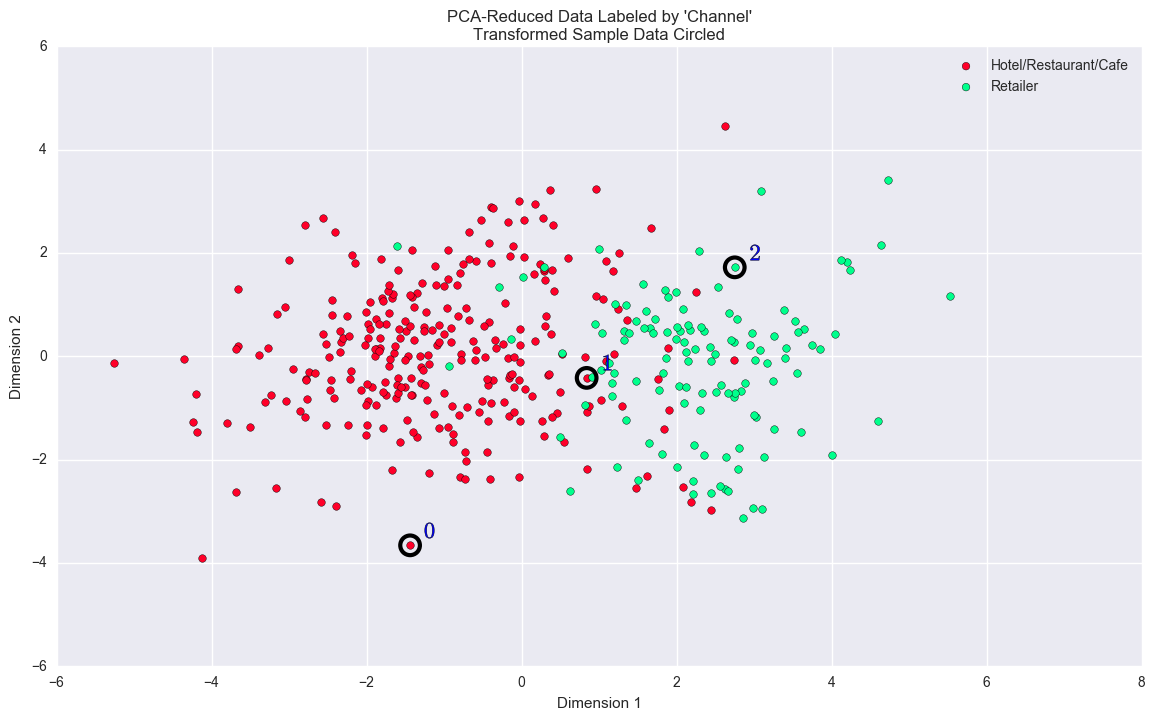

In [71]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** There is an area between the two groups that the algorithm appears to be messing up, but generally the algorithm is predicting correctly. There is a clear distinction in purchasing power (or how much of these resourcers) each business has. There are clear cut cases that are purely retailers or purely businesses, as can clearly be observed in the data (samples of very low values for each feature and samples of very high values of every feature).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.